# ivi - Interactive Visualizations

In [61]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.data import stocks

import pandas as pd
import numpy as np

In [63]:
stocks = stocks()
stocks.head(2)

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988


## Pre-Processing of the Data

In [64]:
for col in stocks.columns[1:]:
    stocks[col] = (stocks[col] - 1) * 100
    

In [ ]:
go.Layout()

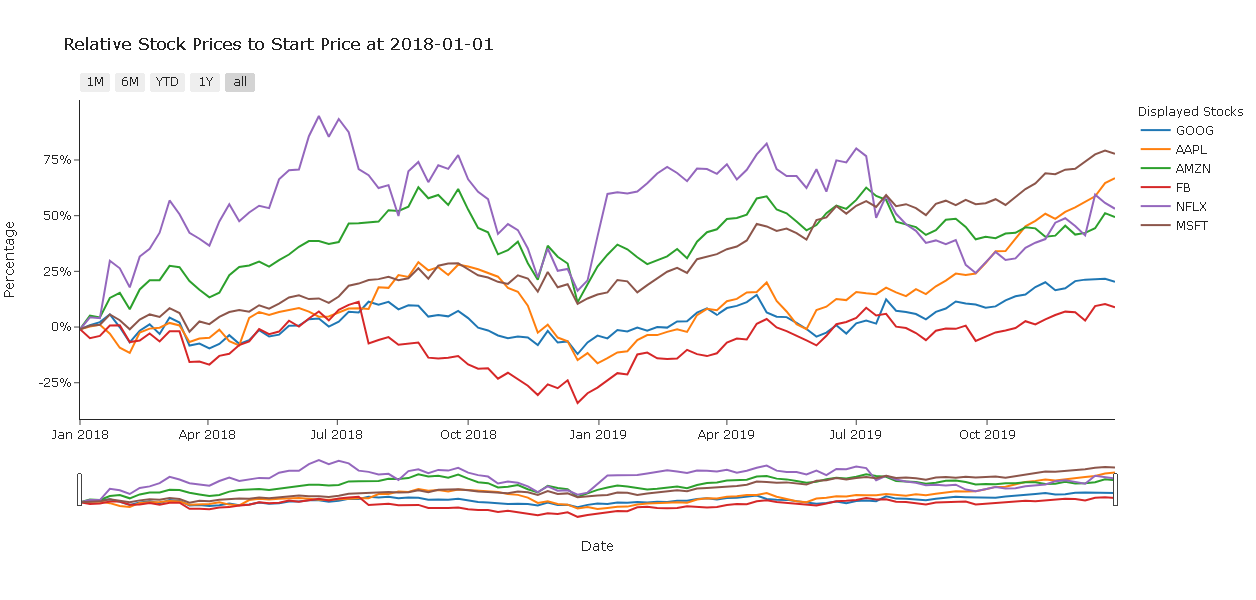

In [66]:
fig = go.Figure()

for col in stocks.columns[1:]:
    fig.add_trace(
        go.Scatter(
            x=stocks['date'],
            y=stocks[col]-1,
            name=col,
            mode='lines'
        )
    )

fig.update_layout(
    template='simple_white',
    title='Relative Stock Prices to Start Price at {}'.format(
        stocks['date'].min(), 
        stocks['date'].max()
    ),
    legend={'title':'Displayed Stocks'},
    height=600, width=1000
)

fig.update_xaxes(
    title_text = 'Date',
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
            dict(count = 1, label = '1M', step = 'month', stepmode = 'backward'),
            dict(count = 6, label = '6M', step = 'month', stepmode = 'backward'),
            dict(count = 1, label = 'YTD', step = 'year', stepmode = 'todate'),
            dict(count = 1, label = '1Y', step = 'year', stepmode = 'backward'),
            dict(step = 'all')]
        )
    )
)

y_tickvalues=np.arange(-50, 100, 25)
fig.update_yaxes(
    title='Percentage',
    tickvals=y_tickvalues,
    ticktext =[str(i)+'%' for i in y_tickvalues]
)

fig.show()